#### **Bước 1. Phân tích các phương thức có trong chương trình**
**Bài toán:** Có tiếng gõ phát ra từ các dây điện. Nó đang nói gì vậy nc jupiter.challenges.picoctf.org 48247?

**Hint:** 
- Loại mã hóa nào sử dụng dấu gạch ngang và dấu chấm?
- Cờ có định dạng `PICOCTF{}`



**Phân tích**

Khi kết nối `ncat jupiter.challenges.picoctf.org 48247`, ta thu được mã Morse:
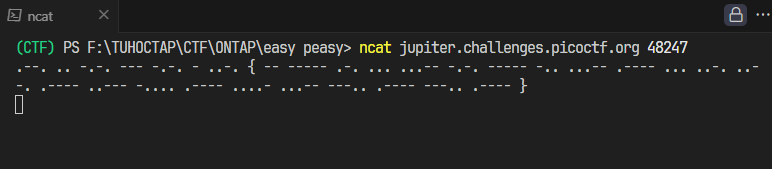
**Cách giải quyết** 

Viết chương trình dịch mã

In [8]:
from pwn import *
from Crypto.Util.number import *
import subprocess
from IPython.display import clear_output

# Mảng chữ cái và mã Morse tương ứng
letters = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z'
]

morse_letters = [
    '.-', '-...', '-.-.', '-..', '.', '..-.', '--.', '....', '..', '.---',
    '-.-', '.-..', '--', '-.', '---', '.--.', '--.-', '.-.', '...', '-',
    '..-', '...-', '.--', '-..-', '-.--', '--..'
]

# Mảng chứa các chữ số và mảng mã Morse tương ứng
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

morse_digits = [
    '-----',  # 0
    '.----',  # 1
    '..---',  # 2
    '...--',  # 3
    '....-',  # 4
    '.....',  # 5
    '-....',  # 6
    '--...',  # 7
    '---..',  # 8
    '----.'   # 9
]

char_lst = letters + digits
morse_lst = morse_letters + morse_digits

char_mapping = {morse_lst[i]: char_lst[i] for i in range(len(morse_lst))}

# Tạo một conection remote:
port = 48247
r = remote('jupiter.challenges.picoctf.org', port)

# Lấy flag được mã hóa
flag_enc = r.recvline(keepends=False).strip().decode()

flag_enc_lst = flag_enc.split()
flag = []
for block in flag_enc_lst:
    if block in char_mapping:
        flag.append(char_mapping[block])
    else:
        flag.append(block)
print("".join(flag))

[x] Opening connection to jupiter.challenges.picoctf.org on port 48247
[x] Opening connection to jupiter.challenges.picoctf.org on port 48247: Trying 3.131.60.8
[+] Opening connection to jupiter.challenges.picoctf.org on port 48247: Done
PICOCTF{M0RS3C0D31SFUN1261438181}
